<a href="https://colab.research.google.com/github/prakharsrivastava/powerbi/blob/main/Data_Science_on_Google_Cloud_Platform_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
from google.colab import drive

drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/chapter2/


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/chapter2


In [ ]:
#flight data
https://raw.githubusercontent.com/GoogleCloudPlatform/data-science-on-gcp/main/04_streaming/transform/flights_sample.json

In [115]:
!pip install findspark 
!pip install  pyspark




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [116]:
import findspark
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[1]").appName("architectinaction.com").getOrCreate()

In [117]:
%pip install pytz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from google.cloud import bigquery

In [119]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [120]:
%%sql
sqlite:///mydb_

'Connected: @mydb_'

In [198]:
import pandas as pd
airports = pd.read_csv('airports.csv',low_memory=False,nrows=3)
flight = pd.read_json('flights_sample.json',lines=True)

In [235]:
sparkAirportsDF=spark.createDataFrame(airports)
sparkFlightDF=spark.createDataFrame(flight)

In [151]:

import sqlite3
conn = sqlite3.connect('mydb_')
c = conn.cursor()
flight.to_sql('flights_view_', conn, if_exists='replace', index = False)

In [152]:
import pandas as pd
df = pd.read_json('flights_sample.json',lines=True)

import sqlite3
conn = sqlite3.connect('mydb_')
c = conn.cursor()
df.to_sql('flights_view_', conn, if_exists='replace', index = False)

In [ ]:
%%sql
SELECT
 *
FROM flights_view_

In [ ]:
%%sql
SELECT
  -18/COUNT(arr_delay) AS frac_delayed
FROM flights_view_

 * sqlite:///mydb_
Done.


frac_delayed
0


In [236]:
sparkFlightDF=sparkFlightDF.select("ARR_DELAY","DEP_DELAY")



In [237]:
from pyspark.sql.functions import *
sparkFlightDF=sparkFlightDF.withColumn("ontime",when(col("ARR_DELAY")<0,"True").when(col("DEP_DELAY")>0,"True").otherwise("false") )
sparkFlightDF.show()

+---------+---------+------+
|ARR_DELAY|DEP_DELAY|ontime|
+---------+---------+------+
|    -18.0|     -5.0|  True|
|    -19.0|     -4.0|  True|
|      4.0|     13.0|  True|
|    -19.0|     -9.0|  True|
|      NaN|      NaN|  True|
|    -18.0|    -11.0|  True|
|     52.0|     28.0|  True|
|    -12.0|     -6.0|  True|
|    -20.0|     -4.0|  True|
|     -5.0|     -1.0|  True|
|     -7.0|     -4.0|  True|
|     -1.0|     -1.0|  True|
|    -18.0|     -7.0|  True|
|      9.0|     13.0|  True|
|      0.0|      6.0|  True|
|    -13.0|    -12.0|  True|
|     36.0|     46.0|  True|
|     -8.0|      0.0|  True|
|    -10.0|      2.0|  True|
|     -7.0|     -3.0|  True|
+---------+---------+------+
only showing top 20 rows



In [239]:
sparkFlightDF=sparkFlightDF.toPandas()

In [238]:
sparkFlightDF

DataFrame[ARR_DELAY: double, DEP_DELAY: double, ontime: string]

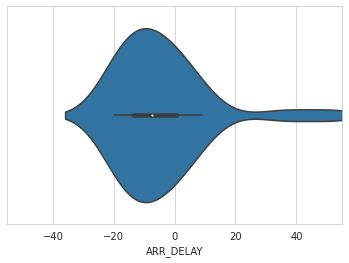

In [240]:
sns.set_style("whitegrid")
# sns.set(font_scale = 1.5)
ax = sns.violinplot(data=sparkFlightDF, x='ARR_DELAY', inner='box', orient='h')
ax.axes.set_xlim(-55, 55);

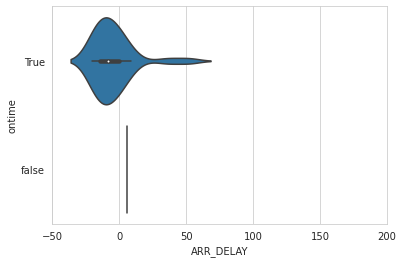

In [241]:
sns.set_style("whitegrid")
ax = sns.violinplot(data=sparkFlightDF, x='ARR_DELAY', y='ontime', inner='box', orient='h')
ax.set_xlim(-50, 200);

In [ ]:
#https://github.com/GoogleCloudPlatform/data-science-on-gcp/blob/main/05_bqnotebook/exploration.ipynb

In [242]:
sparkFlightDF.describe()

,ARR_DELAY,DEP_DELAY
count,30.000000,30.000000
mean,-4.200000,1.133333
std,15.772958,12.389465
min,-20.000000,-12.000000
25%,-13.750000,-6.000000
50%,-7.500000,-2.500000
75%,0.750000,1.750000
max,52.000000,46.000000


In [184]:
import pandas as pd
df = pd.read_sql("""
            SELECT
    DEP_DELAY,
    AVG(ARR_DELAY) AS arrival_delay,
    AVG(ARR_DELAY*ARR_DELAY) - AVG(ARR_DELAY)*AVG(ARR_DELAY) AS stddev_arrival_delay,
    COUNT(ARR_DELAY) AS numflights
FROM
    flights_view_
GROUP BY
    DEP_DELAY
   having DEP_DELAY>0 
ORDER BY DEP_DELAY
            
            """, con = sqlite3.connect('mydb_'))
# return your first five rows


In [243]:
%%sql
SELECT
    DEP_DELAY,
    AVG(ARR_DELAY) AS arrival_delay,
    AVG(ARR_DELAY*ARR_DELAY) - AVG(ARR_DELAY)*AVG(ARR_DELAY) AS stddev_arrival_delay,
    COUNT(ARR_DELAY) AS numflights
FROM
    flights_view_
GROUP BY
    DEP_DELAY
   having DEP_DELAY>0 
ORDER BY DEP_DELAY

 * sqlite:///mydb_
Done.


DEP_DELAY,arrival_delay,stddev_arrival_delay,numflights
1.0,-0.5,2.25,2
2.0,-10.0,0.0,1
6.0,0.0,0.0,1
10.0,2.0,0.0,1
13.0,6.5,6.25,2
18.0,8.0,0.0,1
28.0,52.0,0.0,1
46.0,36.0,0.0,1


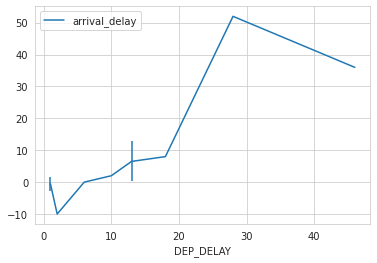

In [244]:
ax = df.plot(kind='line', x='DEP_DELAY', 
              y='arrival_delay', yerr='stddev_arrival_delay')

In [187]:
%%sql
    SELECT
    DEP_DELAY,
    APPROX_QUANTILES(ARR_DELAY, 101) arrival_delay,
    COUNT(ARR_DELAY) AS numflights
FROM
    flights_view_
GROUP BY
    DEP_DELAY
ORDER BY DEP_DELAY

 * sqlite:///mydb_
(sqlite3.OperationalError) no such function: APPROX_QUANTILES
[SQL: SELECT
    DEP_DELAY,
    APPROX_QUANTILES(ARR_DELAY, 101) arrival_delay,
    COUNT(ARR_DELAY) AS numflights
FROM
    flights_view_
GROUP BY
    DEP_DELAY
ORDER BY DEP_DELAY]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [ ]:
import pandas as pd
df = pd.read_sql("""
    SELECT
    DEP_DELAY,
    APPROX_QUANTILES(ARR_DELAY, 101) AS arrival_delay,
    COUNT(ARR_DELAY) AS numflights
FROM
    flights_view_
GROUP BY
    DEP_DELAY
ORDER BY DEP_DELAY
            
            """, con = sqlite3.connect('mydb_'))
# return your first five rows


In [ ]:
z=x-mean/s.d
x=
z*s.d+mean
z score for 30% probablity is 0.52

In [245]:
df['arr_delay_30'] = (0.52 * df['stddev_arrival_delay']) \
             + df['arrival_delay']
x=df['arr_delay_30']
x

0     0.67
1   -10.00
2     0.00
3     2.00
4     9.75
5     8.00
6    52.00
7    36.00
Name: arr_delay_30, dtype: float64

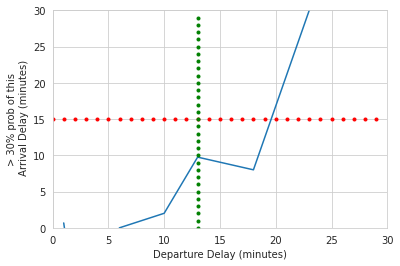

In [189]:
ax = plt.axes()
df.plot(kind='line', x='DEP_DELAY', y='arr_delay_30',
              ax=ax, ylim=(0,30), xlim=(0,30), legend=False)
ax.set_xlabel('Departure Delay (minutes)')
ax.set_ylabel('> 30% prob of this\n Arrival Delay (minutes)');

x = np.arange(-30, 30)
y = np.ones_like(x) * 15
ax.plot(x, y, 'r.');

y = np.arange(-30, 30)
x = np.ones_like(y) * 13
ax.plot(x, y, 'g.');

In [ ]:
#if your departure delay is 19 min more tha your 30% likelihood of arrival >15
#you will cancel meeting if likelyhood 30 % or more
#here data is  normally distributed

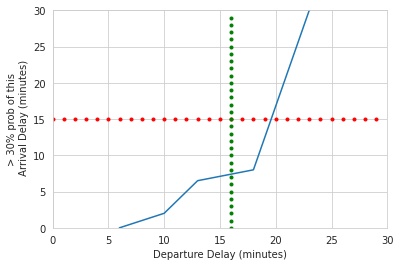

In [246]:
ax = plt.axes()
df.plot(kind='line', x='DEP_DELAY', y='arrival_delay',
              ax=ax, ylim=(0,30), xlim=(0,30), legend=False)
ax.set_xlabel('Departure Delay (minutes)')
ax.set_ylabel('> 30% prob of this\n Arrival Delay (minutes)');

x = np.arange(0, 30)
y = np.ones_like(x) * 15
ax.plot(x, y, 'r.');

y = np.arange(0, 30)
x = np.ones_like(y) * 16
ax.plot(x, y, 'g.');

In [ ]:
%pip freeze

In [110]:
%pip install google-cloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [111]:
#test model


ERROR:
 ("Failed to retrieve http://metadata.google.internal/computeMetadata/v1/instance/service-accounts/default/?recursive=true from the Google Compute Engine metadata service. Status: 404 Response:\nb''", <google.auth.transport.requests._Response object at 0x7faa68640d30>)


In [249]:
#confusion matrix
%%sql
SELECT
  SUM(case when DEP_DELAY < -10  AND arr_delay < 0  then 1 else 0 end ) AS correct_nocancel,
  SUM(case when DEP_DELAY < -10  AND arr_delay >= 0  then 1 else 0 end ) AS wrong_nocancel,
  SUM(case when DEP_DELAY >= -10  AND arr_delay <0  then 1 else 0 end ) AS wrong_cancel,
  SUM(case when DEP_DELAY >= -10  AND arr_delay >= 0  then 1 else 0 end ) AS correct_cancel

FROM (
  SELECT
    DEP_DELAY,
    ARR_DELAY
  FROM
    flights_view_

 
)

 * sqlite:///mydb_
Done.


correct_nocancel,wrong_nocancel,wrong_cancel,correct_cancel
3,0,18,9


In [250]:
import pandas as pd
df_eval = pd.read_sql("""
         SELECT
  SUM(case when DEP_DELAY < -10  AND arr_delay < 0  then 1 else 0 end ) AS correct_nocancel,
  SUM(case when DEP_DELAY < -10  AND arr_delay >= 0  then 1 else 0 end ) AS wrong_nocancel,
  SUM(case when DEP_DELAY >= -10  AND arr_delay <0  then 1 else 0 end ) AS wrong_cancel,
  SUM(case when DEP_DELAY >= -10  AND arr_delay >= 0  then 1 else 0 end ) AS correct_cancel

FROM (
  SELECT
    DEP_DELAY,
    ARR_DELAY
  FROM
    flights_view_

 
)
            
            """, con = sqlite3.connect('mydb_'))
# return your first five rows


In [251]:
#accuracy
print(df_eval['correct_nocancel'] /
      (df_eval['correct_nocancel'] + df_eval['wrong_nocancel']))
print(df_eval['correct_cancel'] / 
      (df_eval['correct_cancel'] + df_eval['wrong_cancel']))

0    1.0
dtype: float64
0    0.333333
dtype: float64
